# Ortam Hazırlama

In [ ]:
#Veri setimizin yer alan kutuphaneyi yükleyelim
%pip install ucimlrepo

In [ ]:
#Gereken kutuphaneleri ekleyelim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.metrics import roc_curve, auc

#1.Veri Seti Yükleme


In [ ]:
 # Veri Setimizi ekleyelim
phishing_websites = fetch_ucirepo(id=327)

# data (as pandas dataframes)
X = phishing_websites.data.features
y = phishing_websites.data.targets

# metadata
print(phishing_websites.metadata)

# Değişkenler Bilgileri
print(phishing_websites.variables)


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

**Veri Setimizde boşta değer yok ve değerleri {-1,0,1} oldukları için veri önişleme yapmamız gerekmiyor.**

# 2.Veri Setini Bölme

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3.Model Oluşturma

## Knn Algoritması


In [ ]:
# Model egitimi ve tahmin
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)

# Degerlendirme
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[[1307  121]
 [ 113 1776]]
              precision    recall  f1-score   support

          -1       0.92      0.92      0.92      1428
           1       0.94      0.94      0.94      1889

    accuracy                           0.93      3317
   macro avg       0.93      0.93      0.93      3317
weighted avg       0.93      0.93      0.93      3317



## Karar Agaçları


[[1292  136]
 [ 135 1754]]
              precision    recall  f1-score   support

          -1       0.91      0.90      0.91      1428
           1       0.93      0.93      0.93      1889

    accuracy                           0.92      3317
   macro avg       0.92      0.92      0.92      3317
weighted avg       0.92      0.92      0.92      3317



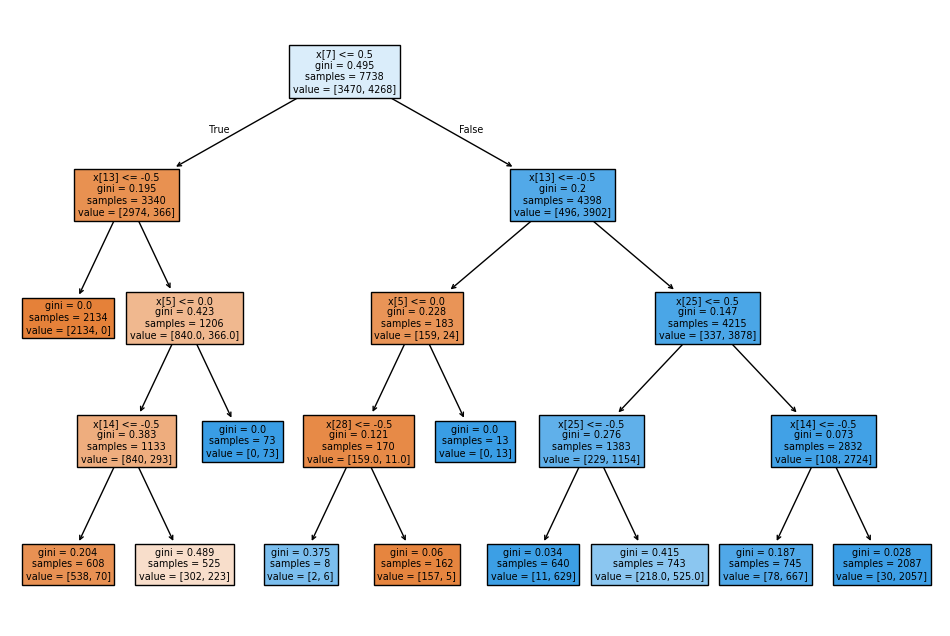

In [ ]:
#Karar agacı olusturuldu.
#Algoritma olarak gini kullanıldı ve derinik 4 ayarlandı.
#hem tahmin sonuclar ve dogruluklar hesaplandı
#hem de karar ağacının şeması
tree_model=DecisionTreeClassifier(criterion="gini",max_depth=4)
tree_model.fit(X_train,y_train)
y_treepred=tree_model.predict(X_test)
y_pred_karar_proba=tree_model.predict_proba(X_test)
print(confusion_matrix(y_test, y_treepred))
print(classification_report(y_test, y_treepred))
plt.figure(figsize=(12,8))
plot_tree(tree_model,filled=True,feature_names=phishing_websites.feature_names,class_names=phishing_websites.target_names)
plt.show()

Knn algoritmasında neighbour(komşu) sayısının 7 seçilmiş olması karar ağacı modelinden daha doğru sonuçlar verilmesini sağladı.

## SVM (Support Vector Machine)

In [ ]:
X_svm = phishing_websites.data.features
y_svm = phishing_websites.data.targets
X_svm_train, X_svm_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size = 0.3, random_state = 42)

model_lin = SVC(kernel = 'linear', C=1.0, probability=True)
model_lin.fit(X_svm_train, y_svm_train)
y_score_svm_lin = model_lin.predict_proba(X_svm_test)[:,1]

model_rbf = SVC(kernel = 'rbf', C=1.0, gamma = 0.1, probability=True)
model_rbf.fit(X_svm_train, y_svm_train)
y_score_svm_rbf = model_rbf.predict_proba(X_svm_test)[:,1]
y_pred_svm_rbf = model_rbf.predict(X_svm_test)
y_pred_svm_lin = model_lin.predict(X_svm_test)

print("Lineer SVM: Verilerin Dogrusal ayrilmasi\n")
print(confusion_matrix(y_svm_test, y_pred_svm_lin))
print(classification_report(y_svm_test, y_pred_svm_lin))
print("\nRBF SVM\n")
print(confusion_matrix(y_svm_test, y_pred_svm_rbf))
print(classification_report(y_svm_test, y_pred_svm_rbf))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Random Forest

In [ ]:
#Model Random Forest ile eğitildi.
#Sonuçların diğer yöntemlere göre daha doğru sonuç verdiği görüldü.
rd=RandomForestClassifier(n_estimators=100,random_state=42)
rd.fit(X_train,y_train)
y_rfpred=rd.predict(X_test)
y_proba_rf = rd.predict_proba(X_test)

print(confusion_matrix(y_test, y_rfpred))
print(classification_report(y_test, y_rfpred))

## Naive Bayes

In [ ]:
#Naive(Basit Bayes) Regresyon modeli
nbayes=GaussianNB()#modeli olustur
nbayes.fit(X_train,y_train)#modeli egit
y_pred_nbayes=nbayes.predict(X_test)#Tahmin yapıcak test kumesı ile
#Sonucları yazdırma.
y_pred_nbayes_proba=nbayes.predict_proba(X_test)
print("Naive Bayes Regresyonu")
print("Naive Bayes Doğruluk:", accuracy_score(y_test, y_pred_nbayes))
print("Classification Report:\n", classification_report(y_test, y_pred_nbayes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nbayes))


## Regresyon

MSE ort gerçek değerden sapmadır ve 0 a yaklaştıkça daha doğru sonuç verdiği anlaşılır.
r2 1 e yaklaştıkça daha doğrudur

In [ ]:
#Lineer Regresyon modeli.

#Modelin olusturulmasi
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Tahminlerin yapilmasi
y_pred_linear = linear_model.predict(X_test)

#Metriklerin hesaplanmasi
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Lineer Regresyon")
print("MSE:", mse_linear)
print("R2:", r2_linear)

In [ ]:
#Random Forest Regresyon modeli.

#Modelin olusturulmasi
random_forest_model=RandomForestRegressor(n_estimators=100,max_depth=5,random_state=42)
random_forest_model.fit(X_train,y_train)

#Tahminlerin yapilmasi
y_pred_rf=random_forest_model.predict(X_test)

#Metriklerin hesaplanmasi
mse_randfo=mean_squared_error(y_test,y_pred_rf)
r2_randfo=r2_score(y_test,y_pred_rf)

print("\nRandom Forest Regresyonu")
print("Mean Squared Error:",mse_randfo)
print("R2 Score:",r2_randfo)

# 4.Grafikler

## Bar grafiği ile Doğruluk Karşılaştırılması


In [ ]:
#Bar grafikleri icin gerekli olan listelerin olusturulmasi
model_names = ['KNN', 'Karar Ağacı', 'SVM Linear', 'SVM RBF', 'Random Forest']
accuracy_scores = [0.93, 0.92, 0.92, 0.95, 0.97]

#Bar grafiginin olusturulmasi
plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.ylim(0.9, 1)
plt.title('Modellere Göre Doğruluk Karşılaştırması')
plt.xlabel('Modeller')
plt.ylabel('Doğruluk')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Bar grafiği ile MSE ve R² Karşılaştırılması

In [ ]:
#Bar grafikleri icin gerekli olan listelerin olusturulmasi
models = ['Linear', 'Random Forest']
mse_scores = [mse_linear, mse_randfo]
r2_scores = [r2_linear, r2_randfo]

#Bar grafiklerinin olusturulmasi
#R²
plt.figure(figsize=(8, 5))
plt.bar(models, r2_scores, color='lightgreen')
plt.title("Modellere Göre R² Karşılaştırması")
plt.xlabel("Modelleme Yontemleri")
plt.ylabel("R² Degeri")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#MSE
plt.figure(figsize=(8, 5))
plt.bar(models, mse_scores, color='lightblue')
plt.ylim(0, 0.5)
plt.title('Modellere Göre MSE Karşılaştırması')
plt.xlabel('Modelleme Yontemleri')
plt.ylabel('MSE Degeri')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## ROC Egrileri

###-KNN ROC EGRİSİ


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC eğrisi (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # rastgele tahmin çizgisi
plt.xlabel('False Positive Rate (1 - Özgüllük)')
plt.ylabel('True Positive Rate (Duyarlılık)')
plt.title('KNN için ROC Eğrisi ')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-RandomForest Roc egrisi

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-Bayes Roc Egrisi

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_nbayes_proba[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='Basit Bayes ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Basit Bayes - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-SVM(support vector machine) Linear

In [ ]:
fpr_svm_lin, tpr_svm_lin, _ = roc_curve(y_svm_test, y_score_svm_lin)
roc_auc_svm_lin = auc(fpr_svm_lin, tpr_svm_lin)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm_lin, tpr_svm_lin, color='blue', lw=2, label='AUC = %0.2f' % roc_auc_svm_lin)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (100-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC of SVM Linear')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


###-SVM(support vector machine) RBF

In [ ]:
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_svm_test, y_score_svm_rbf)
roc_auc_svm_rbf = auc(fpr_svm_rbf, tpr_svm_rbf)

plt.figure(figsize=(8,6))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='blue', lw=2, label='AUC = %0.2f' % roc_auc_svm_rbf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (100-specificity)')
plt.ylabel('True Positive Rate (sensitivity)')
plt.title('ROC of SVM RBF')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

###-Karar Agaci

In [ ]:
fpr_ka, tpr_ka, _ = roc_curve(y_test, y_pred_karar_proba[:, 1])
roc_auc_ka = auc(fpr_ka, tpr_ka)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Karar agaci ROC (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Karar Agaci - ROC Eğrisi')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()